In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import pandas as pd
import numpy as np

In [ ]:
from matplotlib import style
from sklearn import linear_model
from sklearn.model_selection import train_test_split

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
# data (as pandas dataframes) 
features = breast_cancer_wisconsin_diagnostic.data.features 
targets = breast_cancer_wisconsin_diagnostic.data.targets
num_targets = targets['Diagnosis'].map({'M':0,'B':1})
num_targets


In [ ]:
# Split dataset into 70% training and 30% testing sets
train_set, test_set, train_labels, test_labels = train_test_split(
    features, num_targets, test_size = 0.3, random_state = 1, stratify = num_targets)



In [ ]:
# Train the model using logistic regression
x = train_set
y = train_labels

lgr = linear_model.LogisticRegression()
lgr.fit(X = x, y = y)

# Print model intercept and coefficients
print('Model Intercept:', lgr.intercept_)
print('Model Coefficients:', lgr.coef_)


In [ ]:
# Testing the model
preds_prob = pd.DataFrame(lgr.predict_proba(X=test_set))
preds_prob.columns = ["Malignant", "Benign"]

preds = lgr.predict(X=test_set)
preds_class = pd.DataFrame(preds)
preds_class.columns = ["Prediction"]

orig_result = pd.DataFrame(test_labels)
orig_result.columns = ["Original Result"]

result = pd.concat([preds_prob, preds_class, orig_result], axis=1)
print(result.head())


In [25]:
# Print the confusion matrix using panda crosstab function
print('--- Confusion Matrix ---')
print(pd.crosstab(preds, test_labels))
print()


--- Confusion Matrix ---
Diagnosis   0    1
row_0             
0          58    5
1           6  102


In [28]:
# Print regression scores and classification report
from sklearn import metrics
print('--- Accuracy ---')
print(lgr.score(X=test_set,
                y=test_labels))

print()
print('--- Matrices ---')
print(metrics.classification_report(y_true=test_labels,
                                    y_pred=preds))

--- Accuracy ---
0.935672514619883

--- Matrices ---
              precision    recall  f1-score   support

           0       0.92      0.91      0.91        64
           1       0.94      0.95      0.95       107

    accuracy                           0.94       171
   macro avg       0.93      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



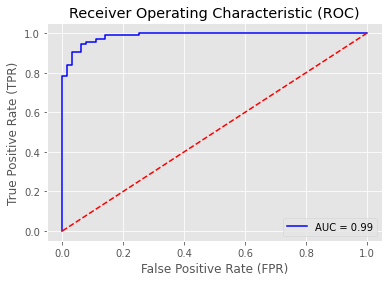

In [33]:
# Plot ROC curve and get area under curve (AUC)
from sklearn.metrics import roc_curve, auc

probs = lgr.predict_proba(test_set)
preds = probs[:,1]

fpr, tpr, threshold = roc_curve(test_labels, preds)

roc_auc = auc(fpr, tpr)

style.use("ggplot")
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.ylabel('True Positive Rate (TPR)')
plt.xlabel('False Positive Rate (FPR)')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc = 'lower right')
plt.show()